In [1]:
'''Make figures of reconstruction quality for attention task.'''

import os
import yaml

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
# Functions #####################################################

def weird_form_to_long(df, target_col, identify_cols=[]):
    df_result = pd.DataFrame()
    for i, row in df.iterrows():
        tmp = {}
        for col in identify_cols:
            tmp[col] = row[col]
        tmp[target_col] = row[target_col]
        df_result = pd.concat([df_result, pd.DataFrame(tmp)])
    return df_result

In [3]:
# Settings #######################################################
conf_file = "config/recon_vggsound_attention_fmriprep_rep4_500voxel_vggishish_allunits_fastl2lir_alpha100.yaml"
output_dir = '../data/figures'

with open(conf_file, 'r') as f:
    conf = yaml.safe_load(f)
quality_file = os.path.join(conf['eval feat output dir'], "quality.pkl.gz")
audiofeature_quality_file = os.path.join(conf['eval feat output dir'], "quality_audiofeature.pkl.gz")
eval_feats = ["mel", "conv1", "conv5", "mix5_d", "mix6_e", "mix7_c", "fc1", "f0", "sc", "hnr"]

subjects = conf['recon subjects']
rois = conf['recon rois']
layers = list(conf['recon layers'].keys())

print("Qaultiy filepath:", quality_file)
print("Audio feature qaultiy filepath:", audiofeature_quality_file)
print("Subjects: {}".format(subjects))
print("ROIs:     {}".format(rois))
print("Layers:   {}".format(layers))
print("Eval feats: {}".format(eval_feats))
quality_df = pd.read_pickle(quality_file)
aud_quality_df = pd.read_pickle(audiofeature_quality_file)
quality_df = pd.concat([quality_df, aud_quality_df])
display(quality_df)



Qaultiy filepath: ../data/recon_features/VGGishish/sound_attention/melception/quality.pkl.gz
Audio feature qaultiy filepath: ../data/recon_features/VGGishish/sound_attention/melception/quality_audiofeature.pkl.gz
Subjects: ['S1', 'S2', 'S3', 'S4', 'S5']
ROIs:     ['AC']
Layers:   ['conv5_3']
Eval feats: ['mel', 'conv1', 'conv5', 'mix5_d', 'mix6_e', 'mix7_c', 'fc1', 'f0', 'sc', 'hnr']


,layer,subject,roi,eval_feat,identification accuracy,pattern correlation for attend,pattern correlation for unattend,profile correlation for attend,profile correlation for unattend,distance for attend,distance for unattend
0,conv5_3,S1,AC,conv1,"[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...","[0.15769070462379445, 0.16021296195205, 0.1033...","[0.3671101808255148, 0.1108841081300743, 0.100...","[0.14605874516734232, 0.022176834665239228, 0....","[0.2734347237109601, 0.23080126070371487, 0.11...",NaN,NaN
1,conv5_3,S1,AC,conv2,"[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...","[0.06611199774378192, 0.0750637420904264, 0.04...","[0.1248347277626313, 0.018518802916677155, 0.0...","[0.04216886049905919, 0.12493320014891313, 0.1...","[0.0015319299262022113, -0.04850476569696643, ...",NaN,NaN
2,conv5_3,S1,AC,conv3,"[0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...","[0.04206343427178004, 0.052677040315383415, 0....","[0.06644077282992387, 0.012875948209306156, 0....","[0.06800759517129489, -0.024142752484890614, -...","[0.08027883917224968, 0.023886229229808705, 0....",NaN,NaN
3,conv5_3,S1,AC,conv4,"[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...","[0.030459468903065, 0.03745552246842092, 0.026...","[0.03552266826643856, 0.017849018111563378, 0....","[-0.07483825423553958, -0.008667255348075635, ...","[-0.048586197856042075, 0.1315941009696089, 0....",NaN,NaN
4,conv5_3,S1,AC,conv5,"[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...","[0.0239857992881428, 0.028842310734159472, 0.0...","[0.020928618510962716, 0.009608184996875635, 0...","[-0.11118631629058234, 0.08810404879990003, 0....","[-0.04668353816933525, -0.08729393222195227, 0...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10,conv5_3,S4,AC,hnr,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...",NaN,NaN,NaN,NaN,"[3.7281419270249616, 0.91245644459255, 3.23172...","[7.421693426141551, 4.712024145626195, 6.10098..."
11,conv5_3,S4,AC,sc,"[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...",NaN,NaN,NaN,NaN,"[313.74239988538466, 313.24883186242096, 255.1...","[949.6998311657051, 1030.628968708794, 763.214..."
12,conv5_3,S5,AC,f0,"[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, ...",NaN,NaN,NaN,NaN,"[203.70021745389604, 79.87320582384635, 73.126...","[499.35734265982535, 45.90073930282202, 44.911..."
13,conv5_3,S5,AC,hnr,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",NaN,NaN,NaN,NaN,"[1.119684846173775, 2.774782203139358, 3.05845...","[2.5738666529428142, 6.574349904173003, 5.9277..."


In [4]:
# Prepare the data for plotting #################################
a_df = quality_df.query("layer == 'conv5_3' and roi == 'AC'")
ident_df = a_df[["subject", "eval_feat", "identification accuracy"]]
ident_df = weird_form_to_long(ident_df, "identification accuracy", ["subject", "eval_feat"])


Saved ../data/figures/Fig8C.png


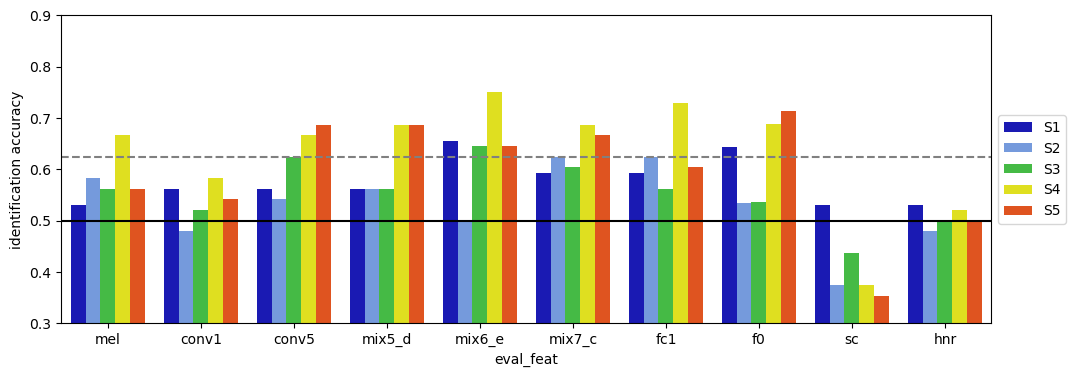

In [5]:
# Fig.3E Identification accuracy #################################
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
sns.barplot(ax=ax, 
            data=ident_df, 
            x="eval_feat", order=eval_feats,
            y="identification accuracy",  
            hue="subject", 
            palette=["mediumblue", "cornflowerblue", "limegreen", "yellow", "orangered"],
            ci=None)
ax.set_ylim([0.3, 0.9])
ax.axhline(0.625, color='gray', linestyle='--')
ax.axhline(0.5, color='k', linestyle='-')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
save_filename = os.path.join(output_dir, 'Fig8C.png')
fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
print('Saved {}'.format(save_filename))

